# Digit Classification on MNIST

MNIST

DataLoader, Transformation

MultiLayer Neural Net, activation function

Loss and Optimizer

Training Loop(batch training)

Model evaluation

GPU Support

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
#device config
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
#hyperparameter
input_size=784  #28x28
hidden_size=100
num_classes=10
num_epochs=2
batch_size=100
leaning_rate=0.001

In [9]:
#MNIST Data
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)

test_dataset=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:13<00:00, 746015.77it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|███████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 3575855.88it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:02<00:00, 646007.74it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 3306235.47it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [10]:
train_loader= torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader= torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [13]:
examples=iter(train_loader)
samples, labels=examples.__next__() 
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


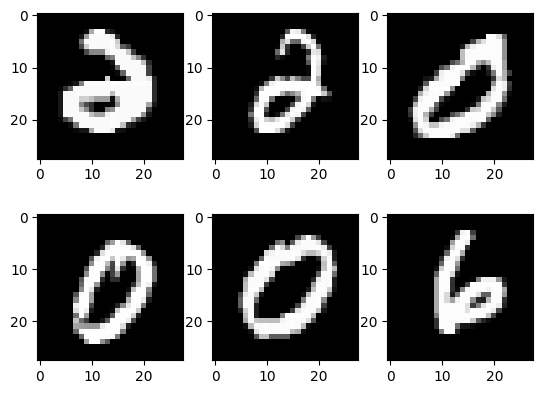

In [16]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')
#plt.show()

In [18]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_of_classes):
        super(NeuralNet, self).__init__()
        self.l1=nn.Linear(input_size, hidden_size)
        self.relu=nn.ReLU()
        self.l2=nn.Linear(hidden_size, num_classes)
        
    def forward(self,x):
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out)
        return out        

In [19]:
model=NeuralNet(input_size,hidden_size,num_classes)

In [23]:
#loss and optimizer
learning_rate=0.01
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [24]:
#training loop
n_total_steps=len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        #shape of image 100,1,28,28
        #100,784
        #reshape tensor
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)
        
        #forward
        outputs=model(images)
        loss=criterion(outputs, labels)
        
        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(i+1)%100==0:
            print(f'{epoch+1}/{num_epochs},step {i+1}/{n_total_steps},loss={loss.item():.4f}')
            
            

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [25]:
#test
with torch.no_grad():
    n_correct=0
    n_samples=0
    for images, labels in test_loader:
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)
        outputs=model(images)
        #value, index
        _, predictions =torch.max(outputs,1)
        n_samples += lapels.shape[0]
        n_correct = (predictions == labels).sum().item()
        
    acc-100*n_correct/n_samples
    print(f'accuracy={acc}')
    

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)